In [1]:
# Importing essential libraries 
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_dilation, binary_fill_holes
import skimage
from skimage.io import imread, imshow 
import skimage.morphology as morph 

## Other Morphological Algorithms - Focus: Hole Filling ##

One of the most useful applications of morphological algorithms is the ability to extract image components that are useful for analysis further downstream. 

We will look at one common use-case: Hole Filling 

Recall that a 'hole' is simply a collection of background pixels surrounded by foreground pixels (object of interest)  
Refer to the binary image below to see several holes across multiple amorphous shapes reminiscent of cells:    

**Note the background (black) and the foreground (white)**  
![image](https://i.sstatic.net/j1ESv.png)  
*Photo taken from: https://stackoverflow.com/questions/22310489/filling-holes-in-objects-that-touch-the-border-of-an-image* 

### 3.1 Logic Behind the Algorithm ### 
Hole filling algorithm based on morphology can be expressed mathematically in the following manner: 

$$X_{k} = (X_{k-1} \oplus B) \cap I^c$$  $$k = 1, 2, 3, ...$$  

Say that there is a shape $A$ that has a hole in the image $I$

What hole-filling does:  
1. A new array $X$ of "0"'s is created with the same dimensions of $I$  
2. Each position of $X$ where there would be a hole in $I$, these pixel positions are set to "1" via dilation operation by structuring element $B$  
3. The conjunction/union operator with $I^c$ ensures that this iterative operation by $B$ becomes only valid for pixel positions within shape $A$ (the hole)  
4. Once it has converged, the shape $A$ and the now filled hole in $X$ are unified to form the filled shape  

Scikit-image provides condensed methods to perform such operations. Below is a more manual demonstration to provide more intuition using the `binary_dilation` method from scipy


In [4]:
# provided a basic binary image 
image = np.zeros((12,12)); image[2:10, 2:10] = True; image[3:9, 3:9] = False # building a binary image with hole 

X_array = np.zeros((12,12)); X_array[3,3] = True # X_array with a seed at X_0

# fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# fig.set_facecolor('grey')

# Plot the original image
# ax[0].imshow(image, cmap='Greys_r')
# ax[0].set_title("Original Image")
# ax[0].axis('off')

# Plot the filtered image
# ax[1].imshow(X_array, cmap='Greys_r')
# ax[1].set_title("Array X with a Pixel Seed Inside Hole Region ($X_{0}$)")
# ax[1].axis('off')

# plt.tight_layout()
# plt.show()


Assuming a structuring element (3 x 3 cross) B, dilation iteratively performed, expanding the "On" pixels by one connectivity step each time while being constrained within the boundaries of the original shape thanks to the boundaries formed by the image's complement ($I^c$)



In [5]:
# fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# fig.set_facecolor('grey')
iteration1 = X_array; iteration1[3,4] = True; iteration1[4,3] = True
# ax[0].imshow(iteration1, cmap='Greys_r'); ax[0].set_title("Array X after Iteration 1"); ax[0].axis('off')

I_c = 1 - image
# ax[1].imshow(I_c, cmap='Greys_r')
# ax[1].set_title("Complement of Image (For Boundary Reference)")
# ax[1].axis('off')

# plt.tight_layout()
# plt.show()

In [6]:
# fig, ax = plt.subplots(1, 2)
# fig.set_facecolor('grey')
iteration2 = X_array; iteration2[4,4] = True; iteration2[3,5] = True; iteration2[5,3] = True
# ax[0].imshow(iteration2, cmap='Greys_r'); ax[0].set_title("Array X after Iteration 2"); ax[0].axis('off')

I_c = 1 - image
# ax[1].imshow(I_c, cmap='Greys_r')
# ax[1].set_title("Complement of Image (For Boundary Reference)")
# ax[1].axis('off')

# plt.tight_layout()
# plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'imshow'

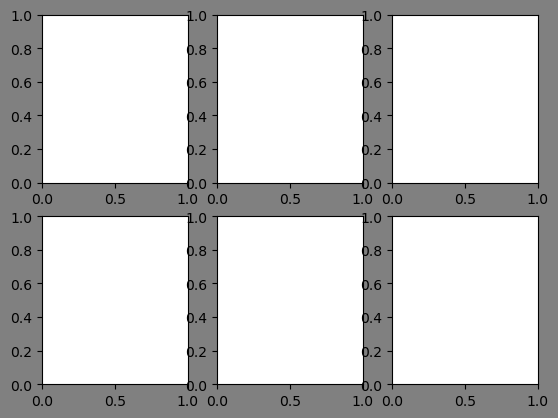

In [ ]:
fig, ax = plt.subplots(2,3) 
fig.set_facecolor('grey')
ax[0, 0].imshow(image); ax[0, 0].set_title('Original Image'); ax[0].axis('off')
ax[1].imshow(X_array); ax[0, 1].set_title('Array X with Pixel Seed inside Hole Region ($X_{0}$)'); ax[1].axis('off')
ax[2].imshow(iteration1); ax[0, 2].set_title("Array X after Iteration 1"); ax[2].axis('off')
ax[3].imshow(iteration2); ax[1, 0].set_title("Array X after Iteration 2"); ax[3].axis('off')
ax[4].imshow(I_c); ax[1, 1].set_title("Complement of Image (Boundary Reference)"); ax[4].axis('off')

plt.tight_layout()
plt.show()



### 3.2 Hole Filling Methods 
While the above attempts to explain the hole filling procedure, thankfully this is not necessary due to the use of existing methods from scikit image and by extension scipy library.  

For this we will use an example picture found on a Stack Overflow forum post:  
*https://stackoverflow.com/questions/22310489/filling-holes-in-objects-that-touch-the-border-of-an-image* 

As we have learned previously and based on the algorithm, hole filling utilizes dilation. But why not use solely binary dilation?  
Hole filling algorithm holds the advantage of constraining the dilation process to explicitly holes rather than the whole ('hole' - bad pun) image itself (referring back to intersection of $I^c$)

C:\Users\zionp\AppData\Local\Temp\ipykernel_33868\2334991723.py:3: FutureWarning: `binary_dilation` is deprecated since version 0.26 and will be removed in version 0.28. Use `skimage.morphology.dilation` instead. Note the lack of mirroring for non-symmetric footprints (see docstring notes).
  dilation = morph.binary_dilation(img, ) # NOTE: this line would be empty


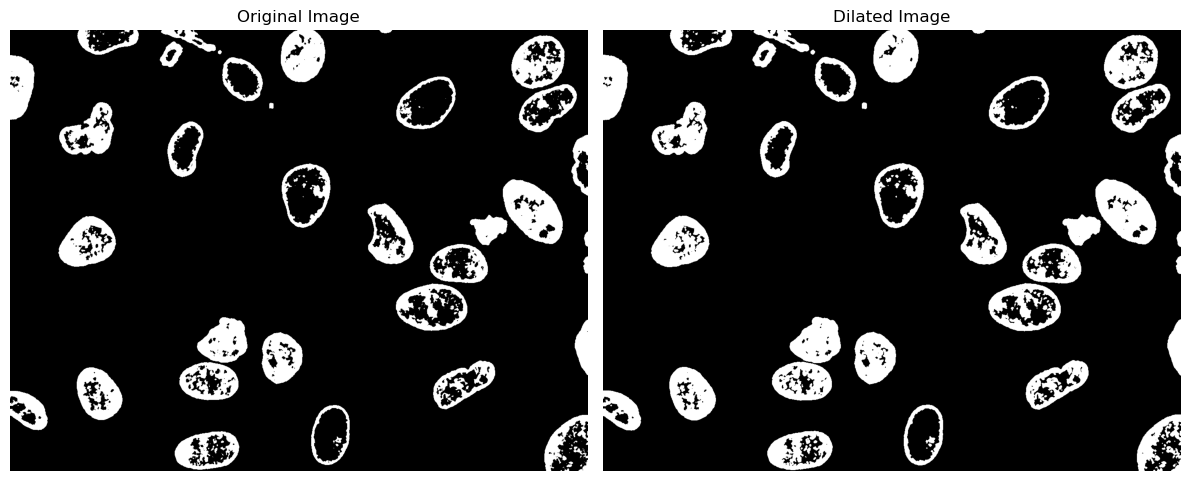

In [70]:
img = imread('cell_holes.png') 
# TODO: try implementing both binary_dilation and binary_fill_holes to see if there is any noticeable difference. Try changing parameters 
dilation = morph.binary_dilation(img, ) # NOTE: this line would be empty 

#Display images:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Original cell_holes image 
axes[0].imshow(img, cmap='Greys_r'); axes[0].set_title("Original Image"); axes[0].axis('off')

# Image using Binary Dilation 
axes[1].imshow(dilation, cmap='Greys_r'); axes[1].set_title("Dilated Image"); axes[1].axis('off')

plt.tight_layout()
plt.show()

Contrast this with binary_fill_holes, which should only cover the holes and does so completely 

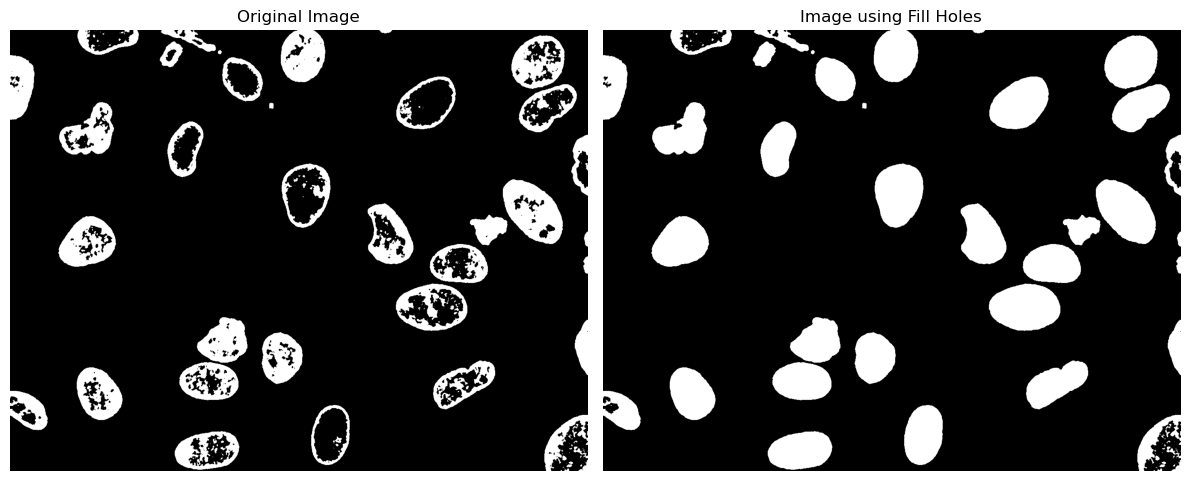

In [71]:
# TODO: try writing out function calling upon method for fill holes algorithm 
filled = binary_fill_holes(img, ) # NOTE: line would be empty 

# Display images:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Original cell_holes image 
axes[0].imshow(img, cmap='Greys_r'); axes[0].set_title("Original Image"); axes[0].axis('off')

# Image using Binary Dilation 
axes[1].imshow(filled, cmap='Greys_r'); axes[1].set_title("Image using Fill Holes"); axes[1].axis('off')

plt.tight_layout()
plt.show()


### Further Notes: Hole Filling for Greyscale Images

Fill Holes algorithm can also work for greyscale images as well. Similar in principle, one can consider "holes" to be darker (lower value) pixel intensity regions surrounded by brighter (higher value) pixel regions. 

The goal of greyscale hole filling is to raise up the hole region's intensity to match it with that of the boundary intensity. This can be expanded more on 9.6 Morphological Reconstruction 



